In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Priprema podataka

In [6]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

Train

In [8]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 41s 95ms/step - loss: 0.7835 - accuracy: 0.7571 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 2/5
422/422 [==============================] - 37s 88ms/step - loss: 0.1238 - accuracy: 0.9612 - val_loss: 0.0601 - val_accuracy: 0.9837
Epoch 3/5
422/422 [==============================] - 38s 90ms/step - loss: 0.0907 - accuracy: 0.9718 - val_loss: 0.0475 - val_accuracy: 0.9880
Epoch 4/5
422/422 [==============================] - 38s 90ms/step - loss: 0.0744 - accuracy: 0.9757 - val_loss: 0.0433 - val_accuracy: 0.9888
Epoch 5/5
422/422 [==============================] - 39s 93ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0376 - val_accuracy: 0.9895


Evaluate model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03582791984081268
Test accuracy: 0.9879999756813049


In [11]:
print(x_test[0].shape)

(28, 28, 1)


7


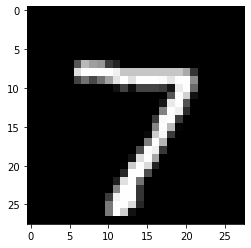

In [18]:
import matplotlib.pyplot as plt  # za prikaz slika, grafika, itd.
%matplotlib inline
# %matplotlib inline je komanda za prikaz slika i grafika unutar notebook-a (ne koristiti u običnim skriptama!!!)
import cv2

import numpy as np
plt.imshow(x_test[0][:,:,0], 'gray')
print(np.argmax(y_test[0]))

In [24]:
x = np.expand_dims(x_test[0], axis=0)
yy = model.predict(x)

In [31]:
print(np.argmax(yy))
print(yy)

7
[[1.4887702e-08 1.8084522e-08 1.0933117e-05 7.6103479e-06 6.8483323e-11
  1.2294753e-09 9.2712720e-15 9.9998045e-01 7.5594166e-08 8.7111346e-07]]


<BarContainer object of 10 artists>

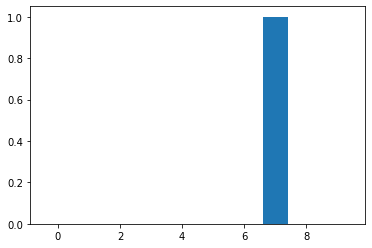

In [39]:
plt.bar(np.arange(0, 10), yy[0])